In [1]:
!pip install pickle5
import pickle5 as pickle

In [94]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 6 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,419 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144617 files and di

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
with open('/content/gdrive/My Drive/project/seoul_contest/대체시설tfidf_log.pkl', 'rb') as f:  
  academy = pickle.load(f)

In [4]:
dolbom = pd.read_csv('/content/gdrive/My Drive/project/seoul_contest/행정동별_공적돌봄시설_필요지수_대체시설제외.csv')

In [5]:
academy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 0 to 423
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   행정동코드      424 non-null    object 
 1   행정동        424 non-null    object 
 2   5-14세      424 non-null    int64  
 3   5-9세(저학년)  424 non-null    int64  
 4   행정구역       424 non-null    object 
 5   시군구        424 non-null    object 
 6   예술학원       424 non-null    int64  
 7   보습학원개수     424 non-null    float64
 8   총학원수       424 non-null    float64
 9   tfidf      424 non-null    float64
 10  tfidf_log  424 non-null    float64
 11  1인당학원수     424 non-null    float64
dtypes: float64(5), int64(3), object(4)
memory usage: 43.1+ KB


In [6]:
academy[academy['행정동']=='신사동']
# 강남구 :1168051000
# academy[academy.iloc[304]['행정동코드']='1168051000']
# academy[academy['행정동']=='신사동'][academy['시군구']=='강남구']['행정동코드']=='1168051000'

,행정동코드,행정동,5-14세,5-9세(저학년),행정구역,시군구,예술학원,보습학원개수,총학원수,tfidf,tfidf_log,1인당학원수
303,1162068500,신사동,939,443,신사동,관악구,15,7.0,22.0,0.001796,23.0,0.023429
304,1162068500,신사동,939,443,신사동,강남구,67,7.0,74.0,0.005855,75.0,0.078807


In [7]:
# 특정 한 셀만 값 바꾸기
academy.at[304,'행정동코드'] = '1168051000'

In [8]:
academy[academy['행정동']=='신사동']

,행정동코드,행정동,5-14세,5-9세(저학년),행정구역,시군구,예술학원,보습학원개수,총학원수,tfidf,tfidf_log,1인당학원수
303,1162068500,신사동,939,443,신사동,관악구,15,7.0,22.0,0.001796,23.0,0.023429
304,1168051000,신사동,939,443,신사동,강남구,67,7.0,74.0,0.005855,75.0,0.078807


In [9]:
academy[['예술학원','5-14세','5-9세(저학년)']] = academy[['예술학원','5-14세','5-9세(저학년)']].apply(pd.to_numeric)

In [10]:
dolbom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   행정동코드                 424 non-null    int64  
 1   행정동                   424 non-null    object 
 2   0509세                 424 non-null    int64  
 3   1014세                 424 non-null    int64  
 4   0514세                 424 non-null    int64  
 5   시군구명                  424 non-null    object 
 6   키움센터_상시돌봄정원           424 non-null    float64
 7   키움센터_일시돌봄정원           424 non-null    float64
 8   키움센터_개수               424 non-null    float64
 9   초등돌봄교실_이용인원           424 non-null    float64
 10  초등돌봄교실_교실개수           424 non-null    float64
 11  지역아동센터_정원             424 non-null    float64
 12  지역아동센터_개수             424 non-null    float64
 13  방과후아카데미_정원            424 non-null    float64
 14  방과후아카데미_개수            424 non-null    float64
 15  총시설수                  4

In [11]:
dolbom.columns

Index(['행정동코드', '행정동', '0509세', '1014세', '0514세', '시군구명', '키움센터_상시돌봄정원',
       '키움센터_일시돌봄정원', '키움센터_개수', '초등돌봄교실_이용인원', '초등돌봄교실_교실개수', '지역아동센터_정원',
       '지역아동센터_개수', '방과후아카데미_정원', '방과후아카데미_개수', '총시설수', 'tfidf', '돌봄교실이용비율',
       'tfidf*이용비율', '행정동별0514세/전체0514세', 'tfidf*이용비율*인구비율', '정원 및 이용비율',
       'tfidf*정원 및 이용비율*인구비율'],
      dtype='object')

In [12]:
# int64 merge error
dolbom['행정동코드']=dolbom['행정동코드'].astype(str)
dolbom['0514세']=dolbom['0514세'].astype(int)
dolbom['1014세']=dolbom['1014세'].astype(int)
dolbom['0509세']=dolbom['0509세'].astype(int)

In [13]:
suyo = pd.merge(dolbom,academy,how='left',on=['행정동코드'])
# suyo = pd.merge(dolbom.set_index('행정동코드'),academy.set_index('행정동코드'),left_index=True,right_index=True)
# suyo

In [14]:
suyo.columns

Index(['행정동코드', '행정동_x', '0509세', '1014세', '0514세', '시군구명', '키움센터_상시돌봄정원',
       '키움센터_일시돌봄정원', '키움센터_개수', '초등돌봄교실_이용인원', '초등돌봄교실_교실개수', '지역아동센터_정원',
       '지역아동센터_개수', '방과후아카데미_정원', '방과후아카데미_개수', '총시설수', 'tfidf_x', '돌봄교실이용비율',
       'tfidf*이용비율', '행정동별0514세/전체0514세', 'tfidf*이용비율*인구비율', '정원 및 이용비율',
       'tfidf*정원 및 이용비율*인구비율', '행정동_y', '5-14세', '5-9세(저학년)', '행정구역', '시군구',
       '예술학원', '보습학원개수', '총학원수', 'tfidf_y', 'tfidf_log', '1인당학원수'],
      dtype='object')

In [15]:

suyo = suyo[['행정동코드', '행정동_x', '0509세', '1014세', '0514세', '시군구명', '키움센터_상시돌봄정원',
       '키움센터_일시돌봄정원', '키움센터_개수', '초등돌봄교실_이용인원', '초등돌봄교실_교실개수', '지역아동센터_정원',
       '지역아동센터_개수', '방과후아카데미_정원', '방과후아카데미_개수', '총시설수', 'tfidf_x', '돌봄교실이용비율',
       'tfidf*이용비율', '행정동별0514세/전체0514세', 'tfidf*이용비율*인구비율', '정원 및 이용비율',
       'tfidf*정원 및 이용비율*인구비율', 
       '예술학원', '보습학원개수', '총학원수', 'tfidf_y', 'tfidf_log', '1인당학원수']]

In [16]:
suyo.columns = ['행정동코드', '행정동_x', '0509세', '1014세', '0514세', '시군구명', '키움센터_상시돌봄정원',
       '키움센터_일시돌봄정원', '키움센터_개수', '초등돌봄교실_이용인원', '초등돌봄교실_교실개수', '지역아동센터_정원',
       '지역아동센터_개수', '방과후아카데미_정원', '방과후아카데미_개수', '총시설수', '돌봄tfidf', '돌봄교실이용비율',
       'tfidf*이용비율', '행정동별0514세/전체0514세', 'tfidf*이용비율*인구비율', '정원 및 이용비율',
       'tfidf*정원 및 이용비율*인구비율', 
       '예술학원', '보습학원개수', '총학원수', '학원tfidf', '학원tfidf_log', '1인당학원수']

### 수요지수

- 돌봄교실이 없는 행정동이 많기 때문에 이용비율 0 이 많다
- 이용비율을 tfidf 에 곱해버리면 중요도가 0 이 되어버림
- 학원tfidf 가 높을 수록 센터의 수요가 있을 것임 !? or 학원이 이미 대체하고 있으므로 센터의 수요가 없을것 ?
- 아마도 학원이 많은건 센터의 수요가 없다고 가정해서 학원tfidf 를 나눠줌(역수)

수요 지수 = (동별 5-14세 인구 비율) * (센터 tfidf / 대체시설 tfidf)

In [17]:
suyo['수요지수'] =  suyo['tfidf*정원 및 이용비율*인구비율'] /suyo['학원tfidf_log']

In [18]:
suyo

,행정동코드,행정동_x,0509세,1014세,0514세,시군구명,키움센터_상시돌봄정원,키움센터_일시돌봄정원,키움센터_개수,초등돌봄교실_이용인원,초등돌봄교실_교실개수,지역아동센터_정원,지역아동센터_개수,방과후아카데미_정원,방과후아카데미_개수,총시설수,돌봄tfidf,돌봄교실이용비율,tfidf*이용비율,행정동별0514세/전체0514세,tfidf*이용비율*인구비율,정원 및 이용비율,tfidf*정원 및 이용비율*인구비율,예술학원,보습학원개수,총학원수,학원tfidf,학원tfidf_log,1인당학원수,수요지수
0,1165065100,양재1동,2808,2337,5145,서초구,20.0,4.0,1.0,498.0,21.0,65.0,2.0,0.0,0.0,24.0,1.335269,0.011401,0.015224,0.007055,0.000107,90.000058,8.478597e-01,35,17.0,52.0,0.004138,53.0,0.010107,1.599735e-02
1,1153078000,오류제2동,2428,2079,4507,구로구,34.0,7.0,1.0,361.0,17.0,54.0,2.0,0.0,0.0,20.0,1.121626,0.008265,0.009270,0.006180,0.000057,96.000058,6.654787e-01,44,26.0,70.0,0.005543,71.0,0.015531,9.372940e-03
2,1150063000,방화제1동,2749,2221,4970,강서구,20.0,0.0,1.0,293.0,12.0,74.0,3.0,0.0,0.0,16.0,0.907983,0.006708,0.006091,0.006815,0.000042,95.000058,5.878750e-01,42,47.0,89.0,0.007026,90.0,0.017907,6.531945e-03
3,1138069000,진관동,3294,4090,7384,은평구,20.0,4.0,1.0,464.0,21.0,19.0,1.0,0.0,0.0,23.0,1.281858,0.010623,0.013617,0.010126,0.000138,44.000058,5.710998e-01,37,27.0,64.0,0.005075,65.0,0.008667,8.786151e-03
4,1138062500,역촌동,1694,1687,3381,은평구,20.0,4.0,1.0,134.0,6.0,152.0,4.0,0.0,0.0,11.0,0.640929,0.003068,0.001966,0.004636,0.000009,177.000058,5.259636e-01,28,43.0,71.0,0.005621,72.0,0.021000,7.305049e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,1114057000,필동,112,68,180,중구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053411,0.000000,0.000000,0.000247,0.000000,1.000058,1.318420e-05,3,0.0,3.0,0.000312,4.0,0.016667,3.296049e-06
420,1114059000,광희동,75,95,170,중구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053411,0.000000,0.000000,0.000233,0.000000,1.000058,1.245174e-05,1,0.0,1.0,0.000156,2.0,0.005882,6.225871e-06
421,1111054000,삼청동,59,106,165,종로구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053411,0.000000,0.000000,0.000226,0.000000,1.000058,1.208551e-05,1,0.0,1.0,0.000156,2.0,0.006061,6.042757e-06
422,1114060500,을지로동,27,17,44,중구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053411,0.000000,0.000000,0.000060,0.000000,1.000058,3.222804e-06,2,0.0,2.0,0.000234,3.0,0.045455,1.074268e-06


In [19]:
# # >>> num = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# q1 = suyo['수요지수'].quantile(.25)
# q3 = suyo['수요지수'].quantile(.75)
# iqr = q3 - q1
# q2 = suyo['수요지수'].quantile(.5)
# q4 = suyo['수요지수'].quantile(1)

#### 수요지수 4분위 수로 나타내기 (IQR)

In [20]:
suyo['수요지수']

0      1.599735e-02
1      9.372940e-03
2      6.531945e-03
3      8.786151e-03
4      7.305049e-03
           ...     
419    3.296049e-06
420    6.225871e-06
421    6.042757e-06
422    1.074268e-06
423    2.685670e-07
Name: 수요지수, Length: 424, dtype: float64

In [21]:
q1 = suyo['수요지수'].describe()['25%']  # Q1 은 1/4 즉, 백분위수에서 25%
q3 = suyo['수요지수'].describe()['75%']  # Q3 은 3/4 즉, 백분위수에서 75%
iqr = q3 - q1  # IQR(Interquartile range) 4분위 범위는 Q3-Q1
q2 = suyo['수요지수'].describe()['50%']  # Q2 (중앙값) 백분위수 50%
print(q1,q3)

3.4336106526071206e-05 0.002305963652177496


In [22]:
suyo['IQR'] = 0
suyo.loc[(suyo['수요지수'] <= q1),'IQR'] = '1'
suyo.loc[(suyo['수요지수'] > q1) & (suyo['수요지수'] <= q2),'IQR'] = '2'
suyo.loc[(suyo['수요지수'] > q2) & (suyo['수요지수'] <= q3),'IQR'] = '3'
suyo.loc[(suyo['수요지수'] > q3),'IQR'] = '4'

In [23]:
# suyo.to_pickle('돌봄시설 수요지수.pkl')
# suyo.to_csv('돌봄시설 수요지수.csv')
suyo

,행정동코드,행정동_x,0509세,1014세,0514세,시군구명,키움센터_상시돌봄정원,키움센터_일시돌봄정원,키움센터_개수,초등돌봄교실_이용인원,초등돌봄교실_교실개수,지역아동센터_정원,지역아동센터_개수,방과후아카데미_정원,방과후아카데미_개수,총시설수,돌봄tfidf,돌봄교실이용비율,tfidf*이용비율,행정동별0514세/전체0514세,tfidf*이용비율*인구비율,정원 및 이용비율,tfidf*정원 및 이용비율*인구비율,예술학원,보습학원개수,총학원수,학원tfidf,학원tfidf_log,1인당학원수,수요지수,IQR
0,1165065100,양재1동,2808,2337,5145,서초구,20.0,4.0,1.0,498.0,21.0,65.0,2.0,0.0,0.0,24.0,1.335269,0.011401,0.015224,0.007055,0.000107,90.000058,8.478597e-01,35,17.0,52.0,0.004138,53.0,0.010107,1.599735e-02,4
1,1153078000,오류제2동,2428,2079,4507,구로구,34.0,7.0,1.0,361.0,17.0,54.0,2.0,0.0,0.0,20.0,1.121626,0.008265,0.009270,0.006180,0.000057,96.000058,6.654787e-01,44,26.0,70.0,0.005543,71.0,0.015531,9.372940e-03,4
2,1150063000,방화제1동,2749,2221,4970,강서구,20.0,0.0,1.0,293.0,12.0,74.0,3.0,0.0,0.0,16.0,0.907983,0.006708,0.006091,0.006815,0.000042,95.000058,5.878750e-01,42,47.0,89.0,0.007026,90.0,0.017907,6.531945e-03,4
3,1138069000,진관동,3294,4090,7384,은평구,20.0,4.0,1.0,464.0,21.0,19.0,1.0,0.0,0.0,23.0,1.281858,0.010623,0.013617,0.010126,0.000138,44.000058,5.710998e-01,37,27.0,64.0,0.005075,65.0,0.008667,8.786151e-03,4
4,1138062500,역촌동,1694,1687,3381,은평구,20.0,4.0,1.0,134.0,6.0,152.0,4.0,0.0,0.0,11.0,0.640929,0.003068,0.001966,0.004636,0.000009,177.000058,5.259636e-01,28,43.0,71.0,0.005621,72.0,0.021000,7.305049e-03,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,1114057000,필동,112,68,180,중구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053411,0.000000,0.000000,0.000247,0.000000,1.000058,1.318420e-05,3,0.0,3.0,0.000312,4.0,0.016667,3.296049e-06,1
420,1114059000,광희동,75,95,170,중구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053411,0.000000,0.000000,0.000233,0.000000,1.000058,1.245174e-05,1,0.0,1.0,0.000156,2.0,0.005882,6.225871e-06,1
421,1111054000,삼청동,59,106,165,종로구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053411,0.000000,0.000000,0.000226,0.000000,1.000058,1.208551e-05,1,0.0,1.0,0.000156,2.0,0.006061,6.042757e-06,1
422,1114060500,을지로동,27,17,44,중구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053411,0.000000,0.000000,0.000060,0.000000,1.000058,3.222804e-06,2,0.0,2.0,0.000234,3.0,0.045455,1.074268e-06,1


Feature 별 상관계수 시각화

- 대체시설tfidf 와 초등학생 인구 양의 상관관계 (0.68)
- 대체시설개수와 초등학생 인구 양의 상관관계 (0.68)
- 돌봄센터tfidf 와 대체시설tfidf 는 0.29로 낮은 상관관계

수요지수와 가장 상관관계가 높은 건 

=> '시설 정원 및 이용비율'(0.8) 'tfidf * 정원 및 이용비율 * 인구비율'(0.78)

대체시설(학원)관련 feature는 수요지수와의 상관관계가 모두 음수
제대로 반영이 안된건지 ? 

#### 수요지수 scaling 작업

In [149]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,100))
# scaler.fit_transform
# plt.plot(m_income['구'],mmscaler.fit_transform(np.array(gu_df['소득 평균']).reshape(-1,1)),label = '연말정산')
# suyo['수요지수_scale'] = scaler.fit_transform(np.array(suyo['수요지수'])).reshape(-1,1)
fitted = scaler.fit_transform(np.array(suyo['수요지수']).reshape(-1,1))
output = pd.DataFrame(fitted)#,columns=suyo.columns,index=list(suyo.index.values))
suyo['수요지수_mmscaler'] = output
# print(output)

In [151]:
suyo.sort_values('수요지수_mmscaler')

,행정동코드,행정동_x,0509세,1014세,0514세,시군구명,키움센터_상시돌봄정원,키움센터_일시돌봄정원,키움센터_개수,초등돌봄교실_이용인원,초등돌봄교실_교실개수,지역아동센터_정원,지역아동센터_개수,방과후아카데미_정원,방과후아카데미_개수,총시설수,돌봄tfidf,돌봄교실이용비율,tfidf*이용비율,행정동별0514세/전체0514세,tfidf*이용비율*인구비율,정원 및 이용비율,tfidf*정원 및 이용비율*인구비율,예술학원,보습학원개수,총학원수,학원tfidf,학원tfidf_log,1인당학원수,수요지수,IQR,수요지수_mmscaler
423,1174069000,둔촌제1동,6,5,11,강동구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053411,0.000000,0.000000,0.000015,0.000000e+00,1.000058,8.057009e-07,2,0.0,2.0,0.000234,3.0,0.181818,2.685670e-07,1,0.000000
422,1114060500,을지로동,27,17,44,중구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053411,0.000000,0.000000,0.000060,0.000000e+00,1.000058,3.222804e-06,2,0.0,2.0,0.000234,3.0,0.045455,1.074268e-06,1,0.003678
408,1111061500,종로1.2.3.4가동,100,99,199,종로구,0.0,0.0,0.0,50.0,3.0,0.0,0.0,0.0,0.0,3.0,0.213643,0.001145,0.000245,0.000273,6.673693e-08,1.000058,5.830345e-05,32,4.0,36.0,0.002889,37.0,0.180905,1.575769e-06,1,0.005967
390,1165058100,반포4동,994,1069,2063,서초구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053411,0.000000,0.000000,0.002829,0.000000e+00,1.000058,1.511056e-04,47,41.0,88.0,0.006948,89.0,0.042656,1.697815e-06,1,0.006524
395,1150056000,화곡제3동,743,734,1477,강서구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053411,0.000000,0.000000,0.002025,0.000000e+00,1.000058,1.081837e-04,24,22.0,46.0,0.003669,47.0,0.031144,2.301780e-06,1,0.009281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,1168070000,세곡동,3120,2490,5610,강남구,25.0,5.0,1.0,458.0,21.0,19.0,1.0,0.0,0.0,23.0,1.281858,0.010486,0.013441,0.007693,1.034005e-04,50.000058,4.930608e-01,26,15.0,41.0,0.003279,42.0,0.007308,1.173954e-02,4,53.586135
14,1154571000,시흥제5동,545,586,1131,금천구,0.0,0.0,0.0,176.0,9.0,236.0,5.0,0.0,0.0,14.0,0.801161,0.004029,0.003228,0.001551,5.006678e-06,237.000058,2.944816e-01,14,9.0,23.0,0.001874,24.0,0.020336,1.227007e-02,4,56.007813
10,1135059500,공릉1동,1263,1215,2478,노원구,23.0,4.0,1.0,239.0,10.0,118.0,4.0,0.0,0.0,15.0,0.854572,0.005472,0.004676,0.003398,1.588921e-05,146.000058,4.239651e-01,19,11.0,30.0,0.002420,31.0,0.012107,1.367629e-02,4,62.426809
0,1165065100,양재1동,2808,2337,5145,서초구,20.0,4.0,1.0,498.0,21.0,65.0,2.0,0.0,0.0,24.0,1.335269,0.011401,0.015224,0.007055,1.074083e-04,90.000058,8.478597e-01,35,17.0,52.0,0.004138,53.0,0.010107,1.599735e-02,4,73.021721


In [152]:
suyo.columns

Index(['행정동코드', '행정동_x', '0509세', '1014세', '0514세', '시군구명', '키움센터_상시돌봄정원',
       '키움센터_일시돌봄정원', '키움센터_개수', '초등돌봄교실_이용인원', '초등돌봄교실_교실개수', '지역아동센터_정원',
       '지역아동센터_개수', '방과후아카데미_정원', '방과후아카데미_개수', '총시설수', '돌봄tfidf', '돌봄교실이용비율',
       'tfidf*이용비율', '행정동별0514세/전체0514세', 'tfidf*이용비율*인구비율', '정원 및 이용비율',
       'tfidf*정원 및 이용비율*인구비율', '예술학원', '보습학원개수', '총학원수', '학원tfidf',
       '학원tfidf_log', '1인당학원수', '수요지수', 'IQR', '수요지수_mmscaler'],
      dtype='object')

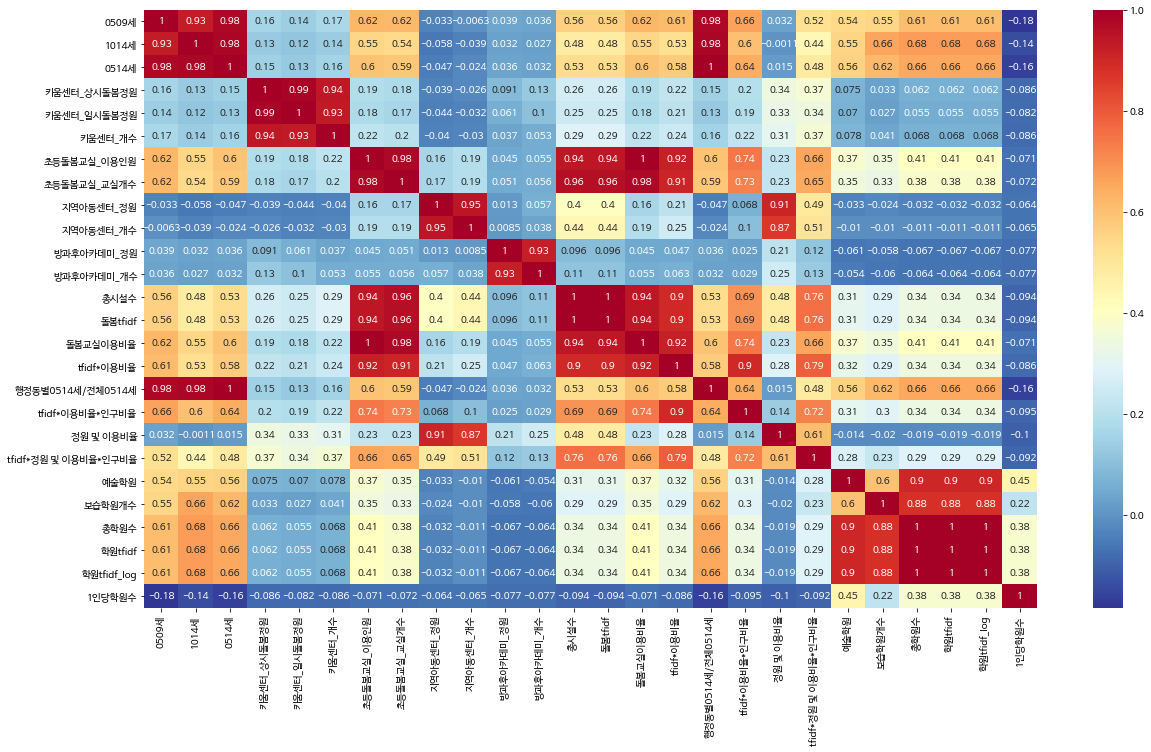

In [25]:
plt.figure(figsize=(20,11))
# mask = np.zeros_like(suyo, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
var= suyo[['행정동코드', '행정동_x', '0509세', '1014세', '0514세', '시군구명', '키움센터_상시돌봄정원',
       '키움센터_일시돌봄정원', '키움센터_개수', '초등돌봄교실_이용인원', '초등돌봄교실_교실개수', '지역아동센터_정원',
       '지역아동센터_개수', '방과후아카데미_정원', '방과후아카데미_개수', '총시설수', '돌봄tfidf', '돌봄교실이용비율',
       'tfidf*이용비율', '행정동별0514세/전체0514세', 'tfidf*이용비율*인구비율', '정원 및 이용비율',
       'tfidf*정원 및 이용비율*인구비율', 
       '예술학원', '보습학원개수', '총학원수', '학원tfidf', '학원tfidf_log', '1인당학원수']].corr()
sns.heatmap(var, annot=True,cmap = 'RdYlBu_r')
plt.rc('font', family='NanumBarunGothic') 
plt.show()

In [26]:
suyo['총시설수'].value_counts().to_frame().style.background_gradient(cmap='Pastel1')

,총시설수
6.0,58
4.0,52
7.0,40
3.0,36
5.0,32
1.0,28
2.0,27
8.0,25
0.0,24
10.0,23


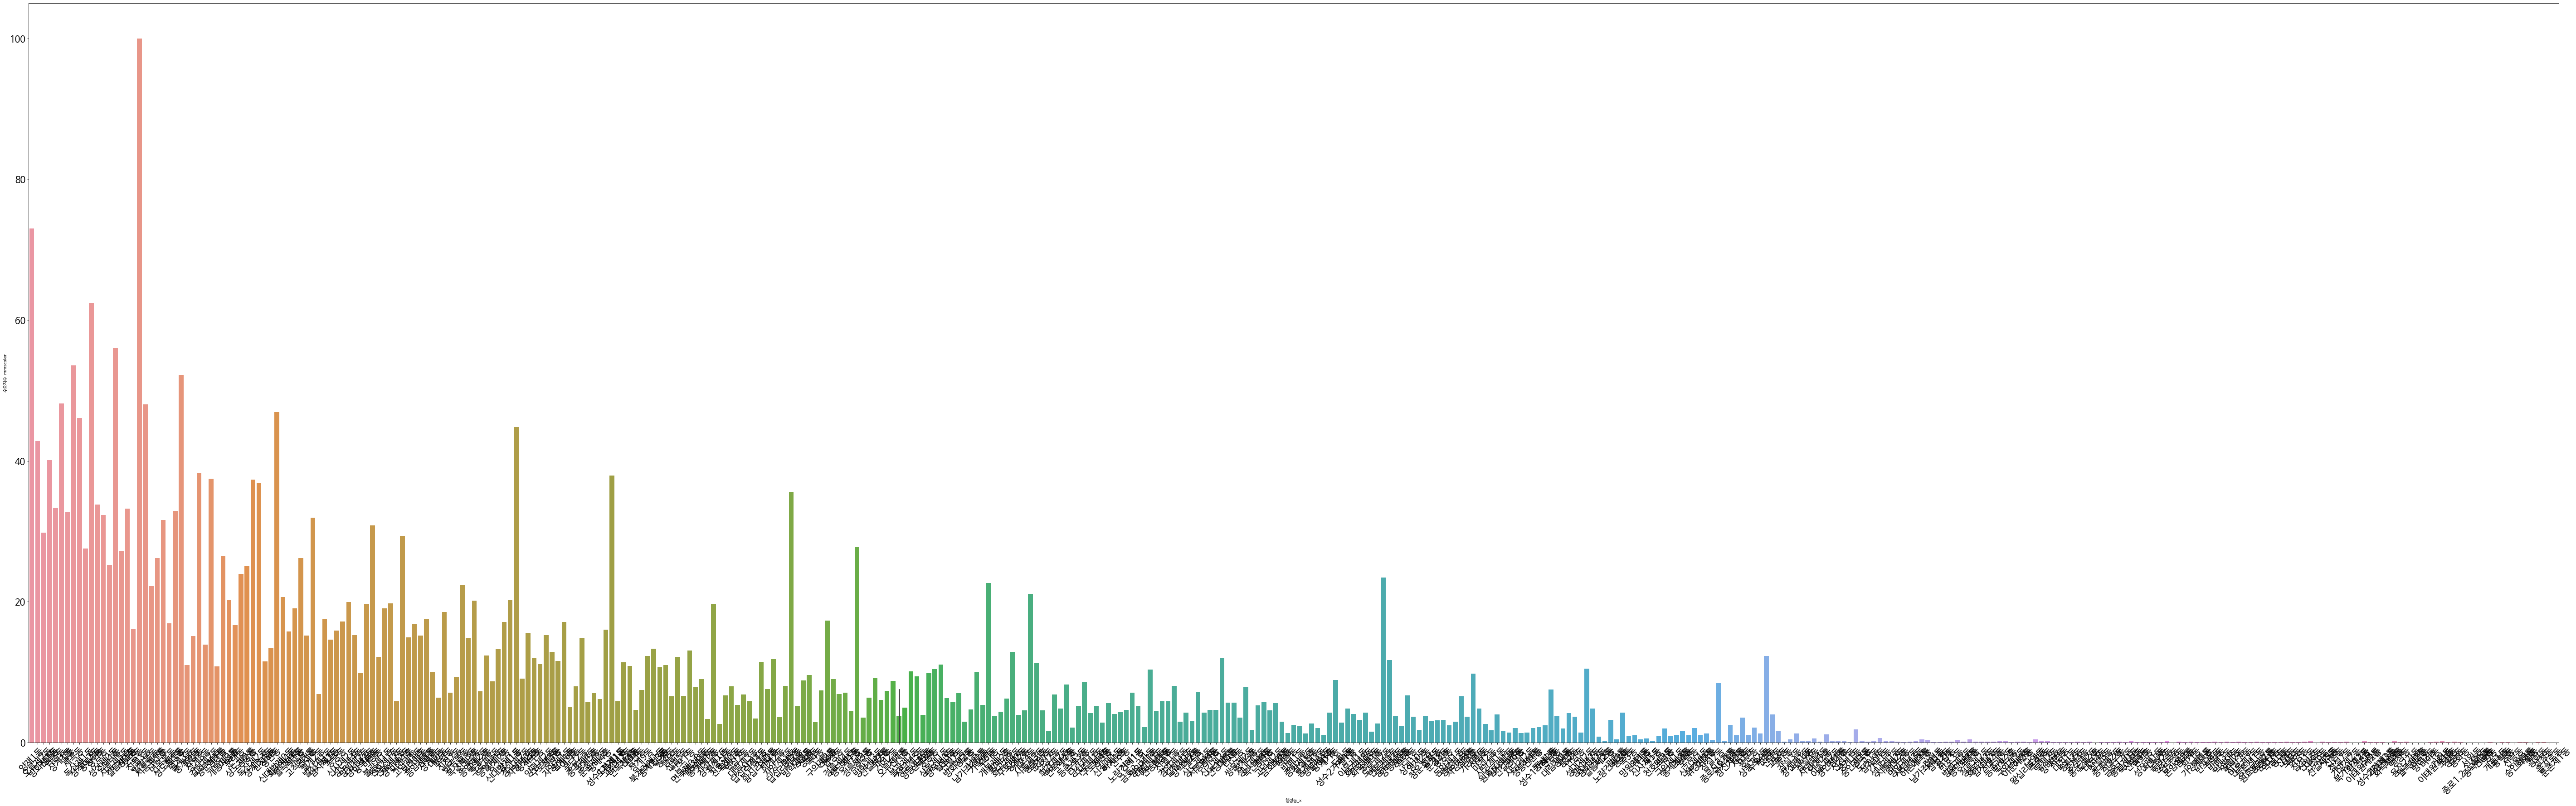

<Figure size 5760x1440 with 0 Axes>

In [153]:
plt.figure(figsize=(100,30))
sns.barplot(data=suyo,x="행정동_x",y="수요지수_mmscaler")
sns.color_palette("Paired")
plt.rc('xtick', labelsize=20) 
plt.xticks(rotation=45)
plt.rc('ytick', labelsize=20) 
plt.figure(figsize=(80,20))
plt.show()

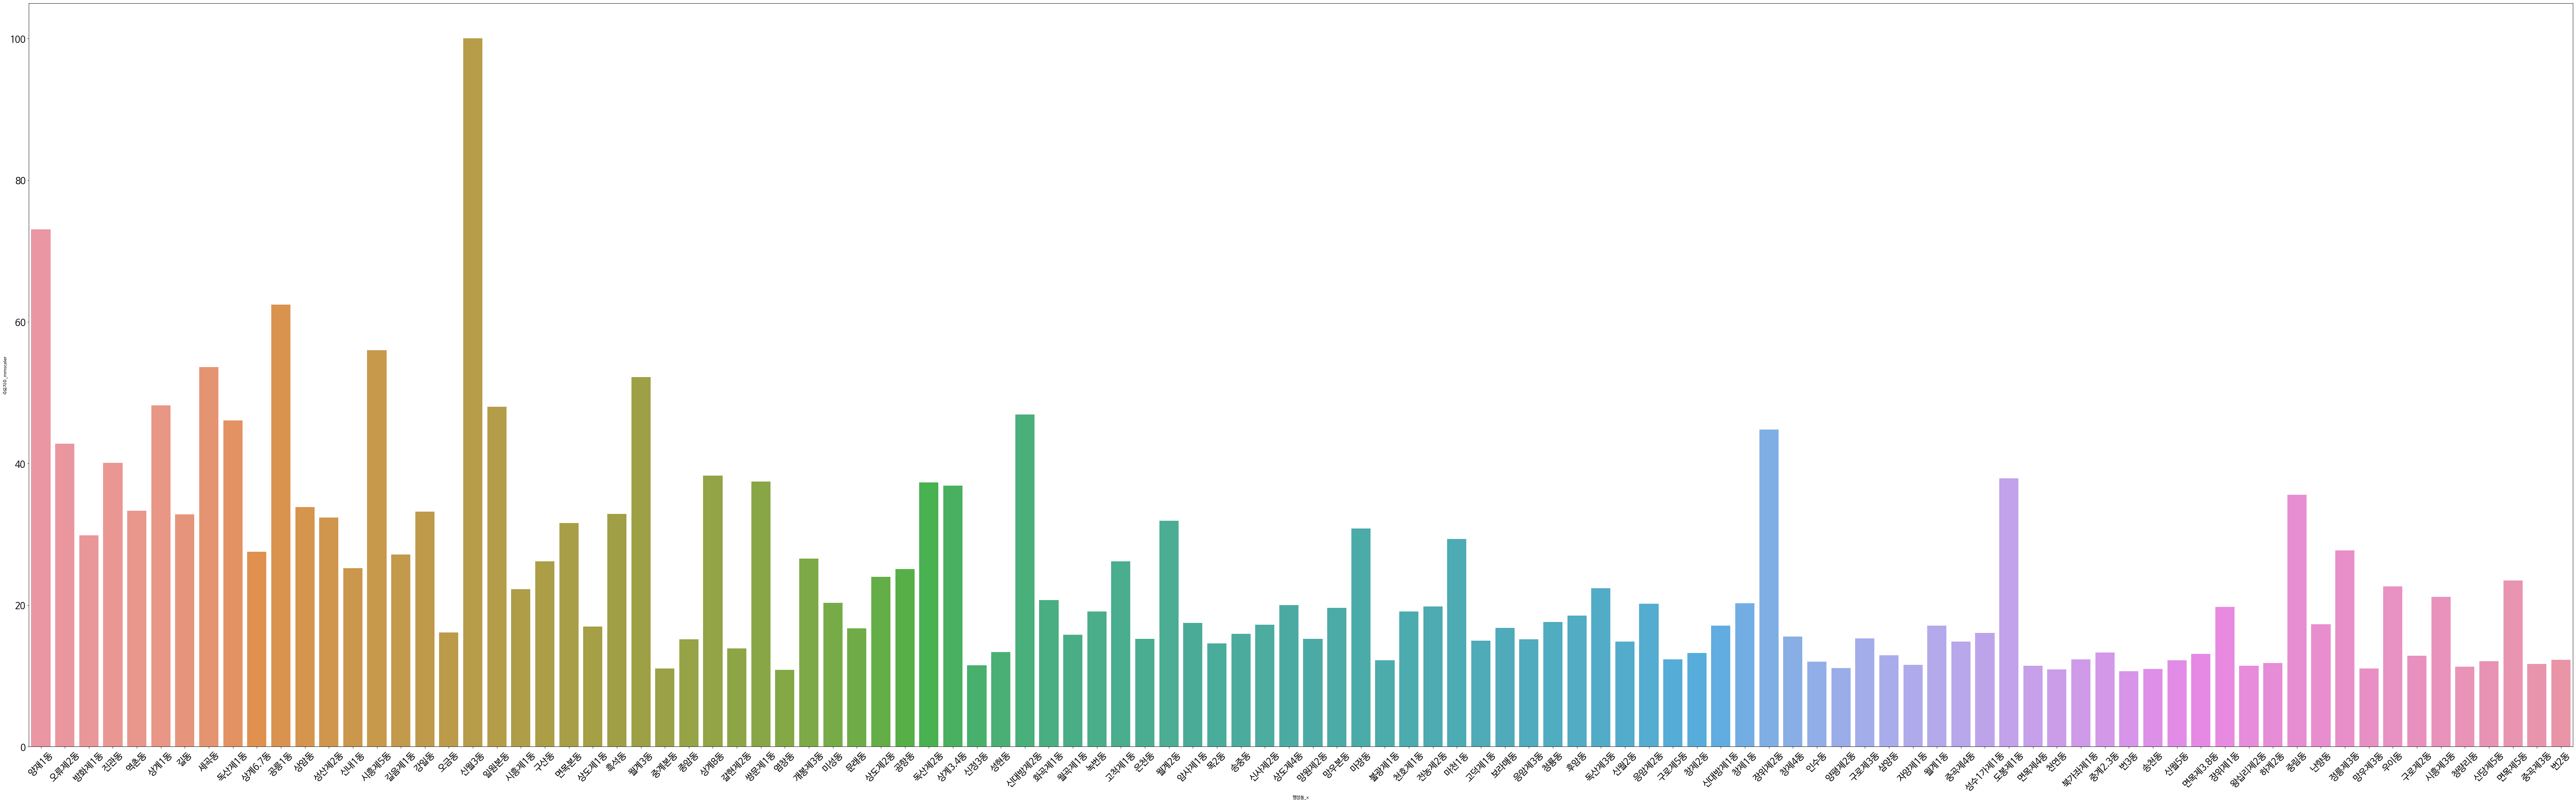

<Figure size 5760x1440 with 0 Axes>

In [154]:
plt.figure(figsize=(100,30))
sns.barplot(data=suyo[suyo['IQR']=='4'],x="행정동_x",y="수요지수_mmscaler")
sns.color_palette("Paired")
plt.rc('xtick', labelsize=20) 
plt.xticks(rotation=45)
plt.rc('ytick', labelsize=20) 
plt.figure(figsize=(80,20))
plt.show()

In [156]:
suyo_df = suyo.replace([np.inf,-np.inf],np.nan).dropna(subset=['수요지수'],how='all')
# plt.hist(suyo['수요지수'], bins=10)

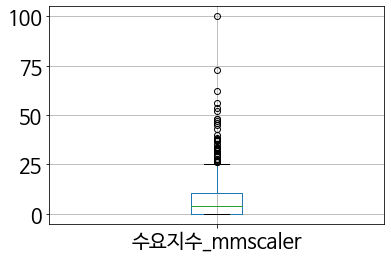

In [157]:
suyo_df.boxplot(column='수요지수_mmscaler')

In [31]:
suyo_df['수요지수'].max(),suyo_df['수요지수'].min()

(0.0219075648685991, 2.685669820527144e-07)

In [32]:
suyo_df['학원tfidf_log'].max(),suyo_df['학원tfidf_log'].min()

(163.0, 1.0)

#### 동별 구별 순위확인을 위한 뻘 작업

In [39]:
suyo_df.columns

Index(['행정동코드', '행정동_x', '0509세', '1014세', '0514세', '시군구명', '키움센터_상시돌봄정원',
       '키움센터_일시돌봄정원', '키움센터_개수', '초등돌봄교실_이용인원', '초등돌봄교실_교실개수', '지역아동센터_정원',
       '지역아동센터_개수', '방과후아카데미_정원', '방과후아카데미_개수', '총시설수', '돌봄tfidf', '돌봄교실이용비율',
       'tfidf*이용비율', '행정동별0514세/전체0514세', 'tfidf*이용비율*인구비율', '정원 및 이용비율',
       'tfidf*정원 및 이용비율*인구비율', '예술학원', '보습학원개수', '총학원수', '학원tfidf',
       '학원tfidf_log', '1인당학원수', '수요지수', 'IQR'],
      dtype='object')

In [67]:
suyo_by_gu.columns

Index(['0509세', '1014세', '0514세', '키움센터_상시돌봄정원', '키움센터_일시돌봄정원', '키움센터_개수',
       '초등돌봄교실_이용인원', '초등돌봄교실_교실개수', '지역아동센터_정원', '지역아동센터_개수', '방과후아카데미_정원',
       '방과후아카데미_개수', '총시설수', '돌봄tfidf', '돌봄교실이용비율', 'tfidf*이용비율',
       '행정동별0514세/전체0514세', 'tfidf*이용비율*인구비율', '정원 및 이용비율',
       'tfidf*정원 및 이용비율*인구비율', '예술학원', '보습학원개수', '총학원수', '학원tfidf',
       '학원tfidf_log', '1인당학원수', '수요지수', '시설정원'],
      dtype='object')

In [78]:
suyo_by_gu = suyo_df.groupby(suyo_df['시군구명']).sum()
suyo_by_gu_m = suyo_df.groupby(suyo_df['시군구명']).mean()

suyo_by_gu['시설정원'] = suyo_by_gu['방과후아카데미_정원'] + suyo_by_gu['지역아동센터_정원']+suyo_by_gu['초등돌봄교실_이용인원']+suyo_by_gu['키움센터_일시돌봄정원']+suyo_by_gu['키움센터_상시돌봄정원']

In [79]:
suyo_by_gu[['총시설수','시설정원']].sort_values(by='시설정원',ascending=False)

,총시설수,시설정원
시군구명,,
노원구,172.0,4077.0
송파구,162.0,3479.0
은평구,140.0,3319.0
강서구,142.0,3189.0
구로구,137.0,3045.0
관악구,119.0,3026.0
양천구,118.0,2913.0
성북구,115.0,2769.0
강동구,119.0,2753.0


In [80]:
suyo_by_gu[['총시설수','시설정원']].sort_values(by='시설정원',ascending=False)

,총시설수,시설정원
시군구명,,
노원구,172.0,4077.0
송파구,162.0,3479.0
은평구,140.0,3319.0
강서구,142.0,3189.0
구로구,137.0,3045.0
관악구,119.0,3026.0
양천구,118.0,2913.0
성북구,115.0,2769.0
강동구,119.0,2753.0


In [81]:
suyo_by_gu[['tfidf*정원 및 이용비율*인구비율']].sort_values(by='tfidf*정원 및 이용비율*인구비율',ascending=False)


,tfidf*정원 및 이용비율*인구비율
시군구명,
노원구,2.805647
은평구,2.314728
강서구,1.521184
구로구,1.513926
강동구,1.414196
금천구,1.322958
동작구,1.201561
성북구,1.090604
서초구,1.050797


In [89]:

# 구별 수요지수 합계
suyo_by_gu[['수요지수']].sort_values(by='수요지수',ascending=False)

,수요지수
시군구명,
노원구,0.084806
은평구,0.048189
금천구,0.047286
동작구,0.042286
성북구,0.042053
구로구,0.041098
양천구,0.039738
중랑구,0.037693
도봉구,0.036191


In [88]:

# 구별 수요지수 평균
suyo_by_gu_m[['수요지수']].sort_values(by='수요지수',ascending=False)

# suyo_by_gu_m
# 수요지수

,수요지수
시군구명,
금천구,0.004729
노원구,0.004463
은평구,0.003012
동작구,0.002819
구로구,0.002740
도봉구,0.002585
중랑구,0.002356
양천구,0.002208
성북구,0.002103


In [87]:
suyo_by_gu[['총학원수']].sort_values(by='총학원수',ascending=False)

,총학원수
시군구명,
강남구,1040.0
송파구,1013.0
양천구,948.0
강서구,792.0
서초구,768.0
노원구,721.0
강동구,646.0
마포구,631.0
은평구,623.0


In [85]:
suyo_df[['행정동_x','시군구명','총학원수']].sort_values(by='총학원수',ascending=False)

,행정동_x,시군구명,총학원수
345,대치4동,강남구,162.0
271,목5동,양천구,154.0
263,서교동,마포구,138.0
293,목1동,양천구,110.0
304,중계1동,노원구,104.0
...,...,...,...
418,회현동,중구,1.0
420,광희동,중구,1.0
421,삼청동,종로구,1.0
282,종로5.6가동,종로구,1.0


In [122]:
suyo_new = suyo_df[['행정동_x','시군구명','총학원수']].sort_values(by='총학원수',ascending=False)
suyo_new = suyo_new.reset_index()
suyo_new
# for i in suyo_new['행정동_x']:
  # if i == ['신월3동','양재1동','공릉1동','시흥제5동','세곡동']:
    # print (suyo_new.loc[i][0])
# suyo_new[suyo_new['행정동_x'] in ['신월3동','양재1동','공릉1동','시흥제5동','세곡동']]

,index,행정동_x,시군구명,총학원수
0,345,대치4동,강남구,162.0
1,271,목5동,양천구,154.0
2,263,서교동,마포구,138.0
3,293,목1동,양천구,110.0
4,304,중계1동,노원구,104.0
...,...,...,...,...
419,418,회현동,중구,1.0
420,420,광희동,중구,1.0
421,421,삼청동,종로구,1.0
422,282,종로5.6가동,종로구,1.0


In [121]:
suyo_new[suyo_new['행정동_x']=='신월3동']

,index,행정동_x,시군구명,총학원수
351,18,신월3동,양천구,11.0


In [123]:
suyo_new[suyo_new['행정동_x']=='양재1동']

,index,행정동_x,시군구명,총학원수
57,0,양재1동,서초구,52.0


In [124]:
suyo_new[suyo_new['행정동_x']=='공릉1동']

,index,행정동_x,시군구명,총학원수
171,10,공릉1동,노원구,30.0


In [125]:
suyo_new[suyo_new['행정동_x']=='시흥제5동']

,index,행정동_x,시군구명,총학원수
239,14,시흥제5동,금천구,23.0


In [126]:
suyo_new[suyo_new['행정동_x']=='세곡동']

,index,행정동_x,시군구명,총학원수
96,7,세곡동,강남구,41.0


In [111]:
suyo_new.loc[0][0]

0

In [100]:
suyo_df[suyo_df['행정동_x']=='신월3동|양재1동|공릉1동|시흥제5동|세곡동'].reset_index()

,index,행정동코드,행정동_x,0509세,1014세,0514세,시군구명,키움센터_상시돌봄정원,키움센터_일시돌봄정원,키움센터_개수,초등돌봄교실_이용인원,초등돌봄교실_교실개수,지역아동센터_정원,지역아동센터_개수,방과후아카데미_정원,방과후아카데미_개수,총시설수,돌봄tfidf,돌봄교실이용비율,tfidf*이용비율,행정동별0514세/전체0514세,tfidf*이용비율*인구비율,정원 및 이용비율,tfidf*정원 및 이용비율*인구비율,예술학원,보습학원개수,총학원수,학원tfidf,학원tfidf_log,1인당학원수,수요지수,IQR,총시설정원


In [86]:
suyo_df[['행정동_x','시군구명','수요지수']].sort_values(by='수요지수',ascending=False)


,행정동_x,시군구명,수요지수
18,신월3동,양천구,2.190756e-02
0,양재1동,서초구,1.599735e-02
10,공릉1동,노원구,1.367629e-02
14,시흥제5동,금천구,1.227007e-02
7,세곡동,강남구,1.173954e-02
...,...,...,...
395,화곡제3동,강서구,2.301780e-06
390,반포4동,서초구,1.697815e-06
408,종로1.2.3.4가동,종로구,1.575769e-06
422,을지로동,중구,1.074268e-06


In [43]:
suyo_df[['행정동_x','시군구명','tfidf*정원 및 이용비율*인구비율']].sort_values(by='tfidf*정원 및 이용비율*인구비율',ascending=False)


,행정동_x,시군구명,tfidf*정원 및 이용비율*인구비율
0,양재1동,서초구,8.478597e-01
1,오류제2동,구로구,6.654787e-01
2,방화제1동,강서구,5.878750e-01
3,진관동,은평구,5.710998e-01
4,역촌동,은평구,5.259636e-01
...,...,...,...
419,필동,중구,1.318420e-05
420,광희동,중구,1.245174e-05
421,삼청동,종로구,1.208551e-05
422,을지로동,중구,3.222804e-06


In [90]:
suyo.columns

Index(['행정동코드', '행정동_x', '0509세', '1014세', '0514세', '시군구명', '키움센터_상시돌봄정원',
       '키움센터_일시돌봄정원', '키움센터_개수', '초등돌봄교실_이용인원', '초등돌봄교실_교실개수', '지역아동센터_정원',
       '지역아동센터_개수', '방과후아카데미_정원', '방과후아카데미_개수', '총시설수', '돌봄tfidf', '돌봄교실이용비율',
       'tfidf*이용비율', '행정동별0514세/전체0514세', 'tfidf*이용비율*인구비율', '정원 및 이용비율',
       'tfidf*정원 및 이용비율*인구비율', '예술학원', '보습학원개수', '총학원수', '학원tfidf',
       '학원tfidf_log', '1인당학원수', '수요지수', 'IQR'],
      dtype='object')

In [92]:
suyo_df['총시설정원'] = suyo_df['초등돌봄교실_이용인원']+suyo_df['지역아동센터_정원']+suyo_df['방과후아카데미_정원']+suyo_df['키움센터_일시돌봄정원']+suyo_df['키움센터_상시돌봄정원']

In [93]:
suyo_df[['행정동_x','시군구명','총시설정원']].sort_values(by='총시설정원',ascending=False)

,행정동_x,시군구명,총시설정원
0,양재1동,서초구,587.0
7,세곡동,강남구,507.0
3,진관동,은평구,507.0
1,오류제2동,구로구,456.0
8,독산제1동,금천구,454.0
...,...,...,...
397,평창동,종로구,0.0
390,반포4동,서초구,0.0
389,북가좌제2동,서대문구,0.0
383,신정6동,양천구,0.0


In [91]:
suyo_df[['행정동_x','시군구명','총시설수']].sort_values(by='총시설수',ascending=False)


,행정동_x,시군구명,총시설수
0,양재1동,서초구,24.0
7,세곡동,강남구,23.0
3,진관동,은평구,23.0
1,오류제2동,구로구,20.0
8,독산제1동,금천구,19.0
...,...,...,...
395,화곡제3동,강서구,0.0
390,반포4동,서초구,0.0
389,북가좌제2동,서대문구,0.0
383,신정6동,양천구,0.0


In [46]:
suyo_df[['행정동_x','시군구명','학원tfidf_log']].sort_values(by='학원tfidf_log',ascending=False)

,행정동_x,시군구명,학원tfidf_log
345,대치4동,강남구,163.0
271,목5동,양천구,155.0
263,서교동,마포구,139.0
293,목1동,양천구,111.0
304,중계1동,노원구,105.0
...,...,...,...
418,회현동,중구,2.0
420,광희동,중구,2.0
421,삼청동,종로구,2.0
282,종로5.6가동,종로구,2.0


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,100))
scaler.fit_transform


<bound method TransformerMixin.fit_transform of MinMaxScaler(copy=True, feature_range=(0, 100))>

#### try

In [35]:
# 전체 구별 현황 그래프
def plot_region(df, x_axis, rc, rot_x=True, show_xlabel=True):
    plt.figure(figsize=(18, 6)) 

    pal = sns.color_palette("Oranges_r", df.shape[0])
    rank = df['수요지수'].argsort().argsort()
    sns.barplot(x=x_axis, y='수요지수', data=df, palette=np.array(pal[::-1])[rank])
    for idx, score in enumerate(df['수요지수']):
        plt.text(idx-0.4, score+0.0005, score, size=10, weight='bold')
    plt.title(f'서울시 자치구별 돌봄시설 수요지수', size=25)
    plt.legend(fontsize=15)
    plt.ylabel(f'수요지수', size=15)
    if rot_x:
        plt.xticks(rotation=45, size=15, ha='right')
    if show_xlabel:
        plt.xlabel(x_axis, size=15)
    else:
        plt.xlabel(None)

    plt.show()

In [158]:
suyo.columns

Index(['행정동코드', '행정동_x', '0509세', '1014세', '0514세', '시군구명', '키움센터_상시돌봄정원',
       '키움센터_일시돌봄정원', '키움센터_개수', '초등돌봄교실_이용인원', '초등돌봄교실_교실개수', '지역아동센터_정원',
       '지역아동센터_개수', '방과후아카데미_정원', '방과후아카데미_개수', '총시설수', '돌봄tfidf', '돌봄교실이용비율',
       'tfidf*이용비율', '행정동별0514세/전체0514세', 'tfidf*이용비율*인구비율', '정원 및 이용비율',
       'tfidf*정원 및 이용비율*인구비율', '예술학원', '보습학원개수', '총학원수', '학원tfidf',
       '학원tfidf_log', '1인당학원수', '수요지수', 'IQR', '수요지수_mmscaler'],
      dtype='object')

No handles with labels found to put in legend.


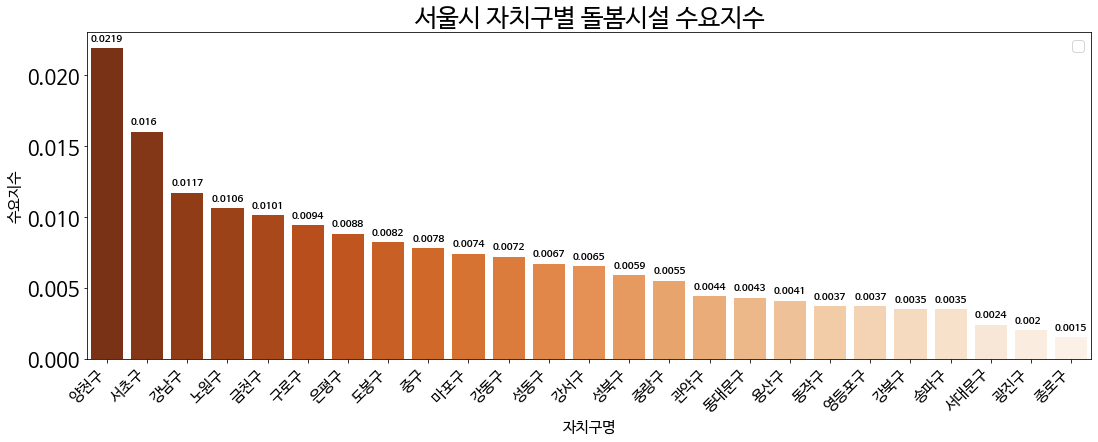

In [159]:
tmp_list = []

for gu in suyo['시군구명'].unique():
    tmp_df = suyo[suyo['시군구명']==gu]
    tmp_list.append(round(tmp_df['수요지수'].values[0],4))

dmd_gu = pd.DataFrame({'자치구명':suyo['시군구명'].unique(), '수요지수':tmp_list})\
                        .sort_values('수요지수', ascending=False).reset_index(drop=True)
plot_region(dmd_gu,'자치구명','수요지수')

#### 수요지수 top5동

In [221]:
# 동별 현황 그래프
def plot_dong_region(gu, x_axis, rot_x=True, show_xlabel=True):

    pop_tmp = suyo[(suyo['시군구명'] == f'{gu}')].reset_index(drop=True)
    tmp_list = []
    for dong in pop_tmp['행정동_x'].unique():
        tmp_df = pop_tmp[pop_tmp['행정동_x']==dong]
        tmp_list.append(round(tmp_df['수요지수_mmscaler'].values[0],4))

    pop_dong = pd.DataFrame({'자치동명':pop_tmp['행정동_x'].unique(), '수요지수':tmp_list})\
                        .sort_values('수요지수', ascending=False).reset_index(drop=True)
    
    plt.figure(figsize=(18, 6))

    pal = sns.color_palette("YlGn", pop_dong.shape[0])
    rank = pop_dong['수요지수'].argsort().argsort()
    sns.barplot(x=x_axis, y='수요지수', data=pop_dong, palette=np.array(pal[::1])[rank])
    # plt.axhline(q1, color='red', alpha=0.5, label=f'서울시 {gu} 동별 돌봄시설 수요지수')
    for idx, score in enumerate(pop_dong['수요지수']):
        plt.text(idx-0.35, score+0.55, score, size=10, weight='bold')
    plt.title(f'서울시 {gu} {x_axis}별 돌봄시설 수요지수', size=25)
    plt.legend(fontsize=15)
    # plt.yticks([])
    plt.ylabel(f'수요지수', size=15)
    if rot_x:
        plt.xticks(rotation=45, size=15, ha='right')
    if show_xlabel:
        plt.xlabel(x_axis, size=15)
    else:
        plt.xlabel(None)

    plt.show()

No handles with labels found to put in legend.


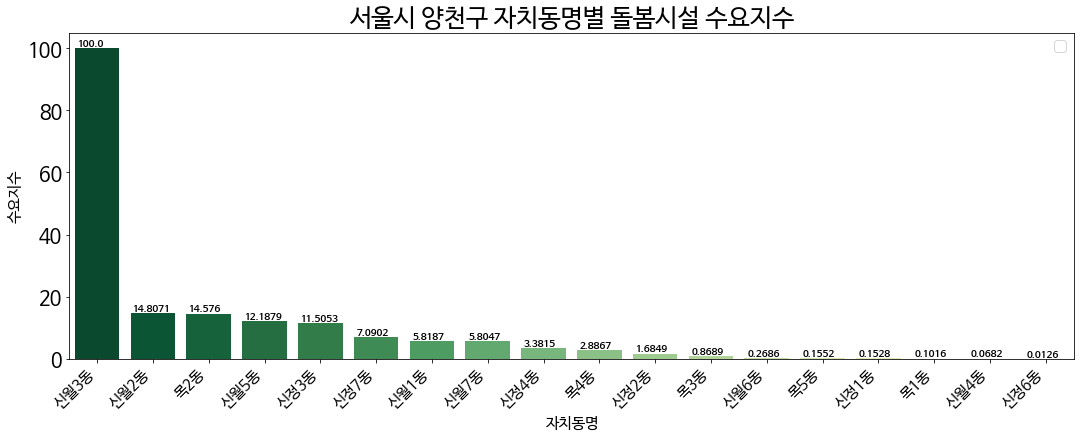

No handles with labels found to put in legend.


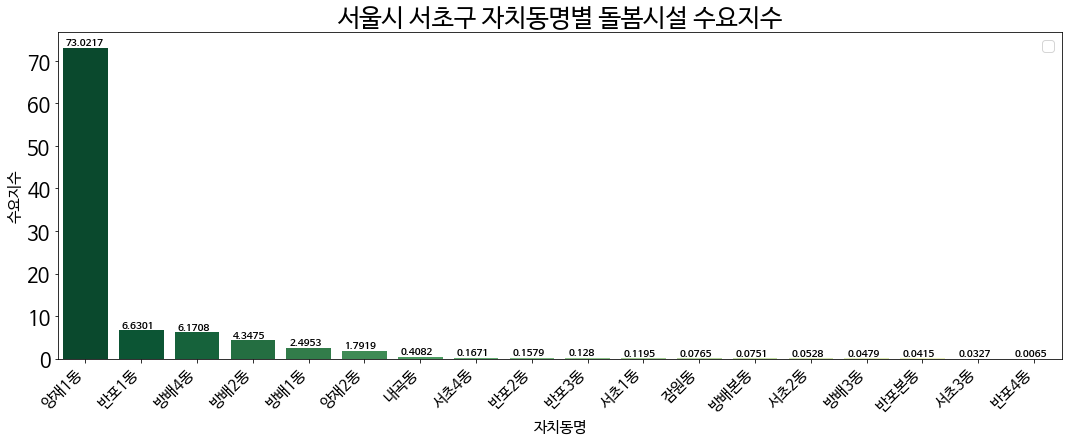

No handles with labels found to put in legend.


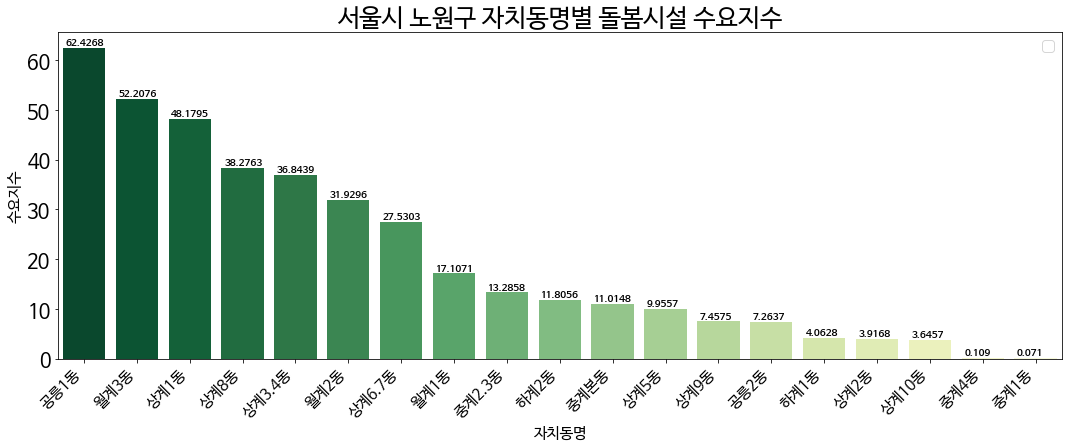

No handles with labels found to put in legend.


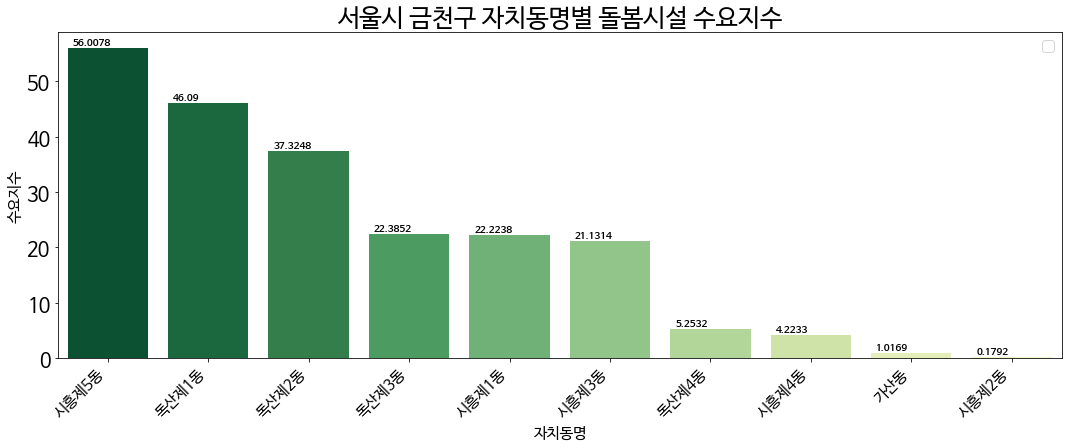

No handles with labels found to put in legend.


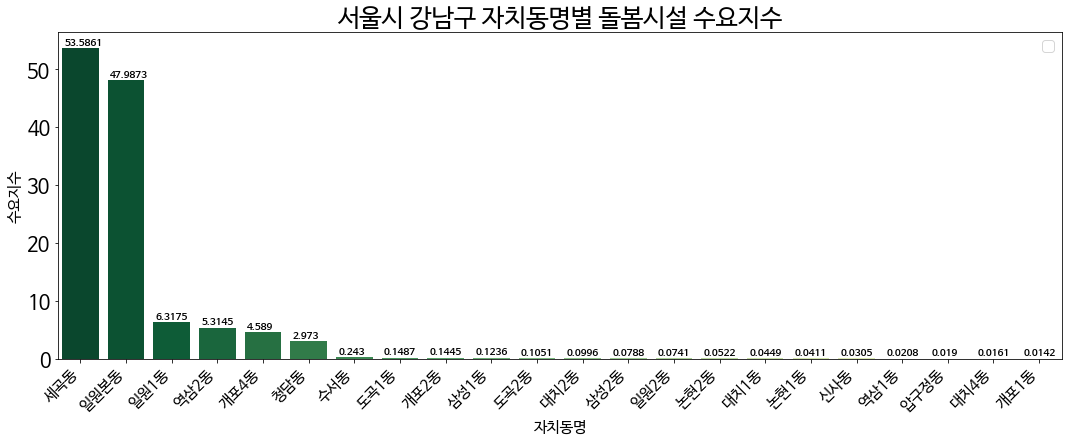

In [222]:
plot_dong_region('양천구','자치동명')
plot_dong_region('서초구','자치동명')
plot_dong_region('노원구','자치동명')
plot_dong_region('금천구','자치동명')
plot_dong_region('강남구','자치동명')

#### 구별 수요지수 시각화

In [194]:
# 전체 구별 현황 그래프
def plot_region_mean(df, x_axis, rc, rot_x=True, show_xlabel=True):
    plt.figure(figsize=(18, 6)) 

    pal = sns.color_palette("Oranges_r", df.shape[0])
    rank = df['수요지수'].argsort().argsort()
    sns.barplot(x=x_axis, y='수요지수', data=df, palette=np.array(pal[::-1])[rank])
    for idx, score in enumerate(df['수요지수']):
        plt.text(idx-0.4, score+0.3, score, size=10, weight='bold')
    plt.title(f'서울시 자치구별 돌봄시설 수요지수 평균', size=25)
    plt.legend(fontsize=15)
    plt.ylabel(f'수요지수', size=15)
    if rot_x:
        plt.xticks(rotation=45, size=15, ha='right')
    if show_xlabel:
        plt.xlabel(x_axis, size=15)
    else:
        plt.xlabel(None)

    plt.show()

scaling

No handles with labels found to put in legend.


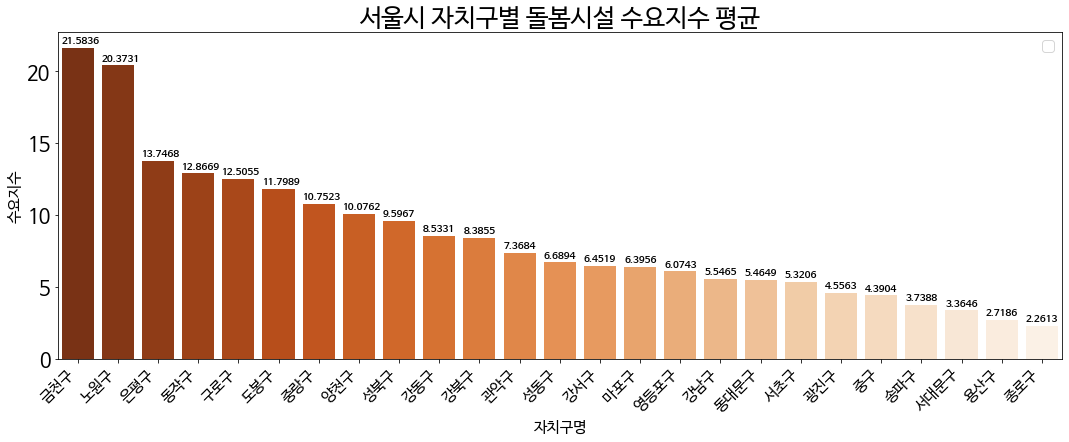

In [223]:
# 평균
tmp_list = []

for gu in suyo['시군구명'].unique():
    tmp_df = suyo[suyo['시군구명']==gu]
    tmp_list.append(round(tmp_df['수요지수_mmscaler'].mean(),4))

dmd_gu = pd.DataFrame({'자치구명':suyo['시군구명'].unique(), '수요지수':tmp_list})\
                        .sort_values('수요지수', ascending=False).reset_index(drop=True)
                        
plot_region_mean(dmd_gu,'자치구명','수요지수')

scaling X , 최고값 sorting

No handles with labels found to put in legend.


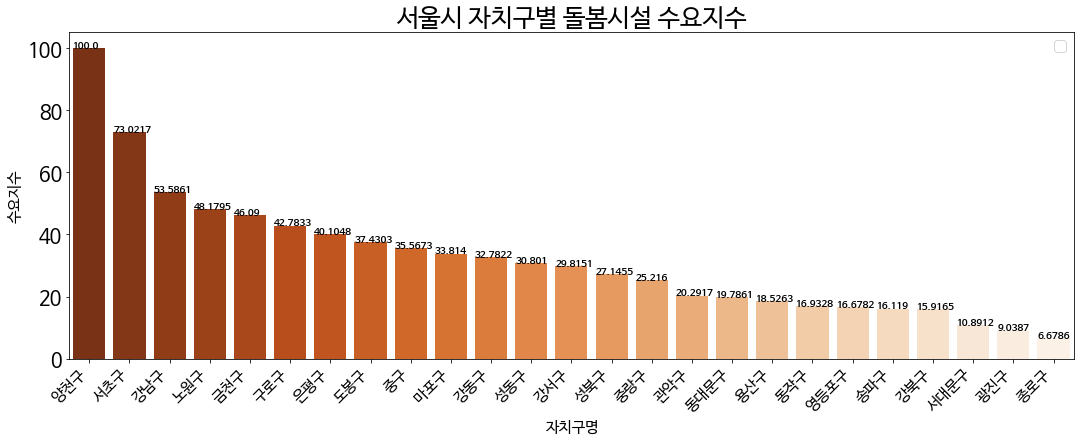

In [225]:
# 구별 max 값 시각화
tmp_list = []

for gu in suyo['시군구명'].unique():
    tmp_df = suyo[suyo['시군구명']==gu]
    tmp_list.append(round(tmp_df['수요지수'].values[0],4))

dmd_gu = pd.DataFrame({'자치구명':suyo['시군구명'].unique(), '수요지수':tmp_list})\
                        .sort_values('수요지수', ascending=False).reset_index(drop=True)
plot_region(dmd_gu,'자치구명','수요지수')